In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.add

[8 8]


In [4]:
def LegendrePolynomial(order, x):
    # -*- coding: utf-8 -*-
    """
LegendrePolynomial takes the coordinates 'x' and computes the order-th Legendre polynomial for those points.
For order 0 and 1 the values are pre-set:

L(0) = 1 for all points
L(1) = x for all points

For order 2 and superior, a recursive relation for the Legendre polynomials is used.
The recursive relation is:

L(order + 1) =  ((2*order + 1) * x * L(order) - order * L(order - 1)) / (order + 1)
    """
    '''
Author: García Hahn, Julián Nicolás
Date: 22-10-2019
    '''
    if isinstance(x, (int, float, complex)) and not isinstance(x, bool):
        x = np.array([x])
    if order < 0:
        raise ValueError("order should be greater than 0. Order is: " + str(order))
        # TODO: Include a warning message for when the x array comes empty
    elif order == 0:
        return np.ones( x.shape )
    elif order == 1:
        return x
    else:
        leg_pol_previous_2 = np.ones( x.shape )
        leg_pol_previous_1 = x
        for counter in range(1, order):
            leg_pol = ((2 * counter ) + 1) * np.multiply( x, leg_pol_previous_1 ) - \
                      counter * leg_pol_previous_2
            leg_pol /= (counter + 1)
            leg_pol_previous_2 = leg_pol_previous_1
            leg_pol_previous_1 = leg_pol
        return leg_pol

In [5]:
def LegendreDerivativePolynomial(order, x):
    # -*- coding: utf-8 -*-
    """
LegendreDerivativePolynomial takes the coordinates 'x' and computes the derivative of the order-th of the Legendre polynomial for those points.
For order 0 and 1 the values are pre-set:

L'(0) = 0 for all points
L'(1) = 1 for all points

For order 2 and superior, a recursive relation for the derivative of the Legendre polynomials is used.
The recursive relation is:

L'(order + 1) =  (order + 1) L(order) + x * L'(order - 1)
    """
    '''
Author: García Hahn, Julián Nicolás
Date: 23-10-2019
    '''
    if isinstance(x, (int, float, complex)) and not isinstance(x, bool):
        x = np.array([x]).astype(float)
    if order < 0:
        raise ValueError("order should be greater than 0. Order is: " + str(order))
        # TODO: Include a warning message for when the x array comes empty or is outside -1, 1 boundaries
    elif order == 0:
        return np.zeros( x.shape )
    elif order == 1:
        return np.ones( x.shape )
    else:
        x = x.astype(float)
        dev_leg_pol_previous = np.ones( x.shape )
        leg_pol_previous_2 = np.ones( x.shape )
        leg_pol_previous_1 = x
        for counter in range(1, order):
            if counter != 1:
                dev_leg_pol_previous = dev_leg_pol
                leg_pol = ((2 * counter ) - 1) * np.multiply( x, leg_pol_previous_1 ) - \
                      (counter - 1) * leg_pol_previous_2
                leg_pol /= (counter)
                leg_pol_previous_2 = leg_pol_previous_1
                leg_pol_previous_1 = leg_pol
            dev_leg_pol = (counter + 1) * leg_pol_previous_1 + np.multiply( x, dev_leg_pol_previous )
        return dev_leg_pol

In [6]:
-

In [7]:
def Weights(order, p):
    return 2/(order * (order - 1) * np.multiply(p, p))

In [8]:
# TOASK: Ask Carlos where this is from.
def GaussLegendreQuadrature(order):
    A = np.zeros([order, order])
    
    A[0, 1] = 1
    if order > 2:
        for counter in range(1, order - 1):
            A[counter, counter - 1] = counter / (2 * counter + 1 )
            A[counter, counter + 1] = (counter + 1)/(2 * counter + 1)
            
    A[-1, -2] = (order - 1)/( 2 * order - 1 )
    points = np.sort( np.linalg.eig( A )[0] ) # Index 0 so it can only take the value of the weights of the eugenvalues
    
    weights = 2 / np.multiply( ( 1 - np.power(points , 2)), np.power(LegendreDerivativePolynomial(order, points), 2) )
    
    
    return (points, weights)

In [9]:
def GaussLobattoLegendreQuadrature( order ):
    GL_points, _ = GaussLegendreQuadrature( order - 1 )
    
    tol = 1e-14
    
    points = np.ones( order )
    points[0] = -1
    points[1:-1] = np.divide((GL_points[:-1] + GL_points[1:]),2)

    for counter in range(1, order - 1 ):
        p_old = 0
        while abs(p_old - points[counter]) > tol:
            p_old = points[counter]
            points[counter] = p_old + np.divide(np.multiply((1 - p_old ** 2), LegendreDerivativePolynomial(order - 1, p_old)) \
                                      , np.multiply((order - 1) * order, LegendrePolynomial(order - 1, p_old)))
    weights = Weights(order, LegendrePolynomial(order - 1, points))
    
    return (points, weights)

In [10]:
def GaussLobattoLegendreQuadratureVec( order ):
    GL_points, _ = GaussLegendreQuadrature( order - 1 )
    tol = 1e-14
    points = np.ones( order )
    points[0] = -1
    points[1:-1] = np.divide((GL_points[:-1] + GL_points[1:]),2)
    
    p_old = np.zeros( order )
    while np.any(np.abs(p_old - points) > tol):
        p_old = points
        points = p_old + np.divide(np.multiply((1 - np.power(p_old, 2)), LegendreDerivativePolynomial(order - 1, p_old)) \
                                      , np.multiply((order - 1) * order, LegendrePolynomial(order - 1, p_old)))
    
    weights = Weights(order, LegendrePolynomial(order - 1, points))
    
    return (points, weights)

In [11]:
GaussLobattoLegendreQuadratureVec( 5 )

(array([-1.        , -0.65465367,  0.        ,  0.65465367,  1.        ]),
 array([ 0.1       ,  0.54444444,  0.71111111,  0.54444444,  0.1       ]))

In [12]:
import time


In [58]:
now = time.time()
time.sleep(1)
print(time.time() - now)

1.0012810230255127


In [14]:
ITER = 5000
now = time.time()
for _ in range(ITER):
    p, w = GaussLobattoLegendreQuadratureVec( 10 )

elapsed = time.time() - now
print(elapsed, "seconds")
print(elapsed / ITER, "seconds per call")

2.510298013687134 seconds
0.0005020596027374267 seconds per call


In [21]:
ITER = 50000
now = time.time()
p, w = GaussLobattoLegendreQuadratureVec( 5 )
elapsed = time.time() - now
print(elapsed, "seconds")
print((elapsed) * 1000, "milliseconds per call")

0.001592874526977539 seconds
1.592874526977539 milliseconds per call


In [15]:
np.__config__.show()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/lib/x86_64-linux-gnu']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/lib/x86_64-linux-gnu']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/lib/x86_64-linux-gnu']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/lib/x86_64-linux-gnu']
    language = c
    define_macros = [('HAVE_CBLAS', None)]


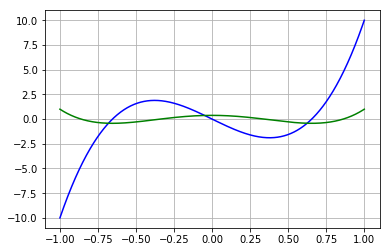

In [14]:
x = np.linspace(-1, 1, 1000)
order = 4
plt.plot(x, LegendreDerivativePolynomial(order, x), color='b')
plt.plot(x, LegendrePolynomial(order, x), color='g')
#plt.ylim(-1, 1)
plt.grid()

In [21]:
LegendreDerivativePolynomial(4, 0.25)

array([-1.6015625])

In [71]:
(y[301] - y[300])/(x[301] - x[300])

1.8813806597185314

In [72]:
x[300]

-0.39939939939939939

In [49]:
y[-2]

SyntaxError: illegal target for annotation (<ipython-input-49-aaee9a7a446f>, line 1)